In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [2]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
p20pcv = sorted(glob.glob('*PTZ20*pcavar.npy'))
blncor = sorted(glob.glob('*BLN*corr.npy'))
p20cor = sorted(glob.glob('*PTZ20*corr.npy'))
blncor

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corr.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corr.npy']

In [3]:
blndis = sorted(glob.glob('*BLN*dis*.npy'))[:2] + sorted(glob.glob('*BLN*dis*.npy'))[4:7] + sorted(glob.glob('*BLN*dis*.npy'))[8:10] 
p20dis = sorted(glob.glob('*PTZ20*dis*.npy'))[:2] + sorted(glob.glob('*PTZ20*dis*.npy'))[4:7] + sorted(glob.glob('*PTZ20*dis*.npy'))[8:10] 
p20dis

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy']

In [28]:
stop = 100000
corr = np.triu(np.load(blncor[0]), k=0)
dis = np.triu(np.load(blndis[0]), k=0)
corrv = corr.flatten()[:stop]
disv = dis.flatten()[:stop]

newcorrv = [0 if i < 0 else i for i in corrv]
newcorrv = np.array(newcorrv)

stop = 100000
corr1 = np.triu(np.load(p20cor[0]), k=0)
dis1 = np.triu(np.load(p20dis[0]), k=0)
corrv1 = corr1.flatten()[:stop]
disv1 = dis1.flatten()[:stop]

newcorrv1 = [0 if i < 0 else i for i in corrv1]
newcorrv1 = np.array(newcorrv1)


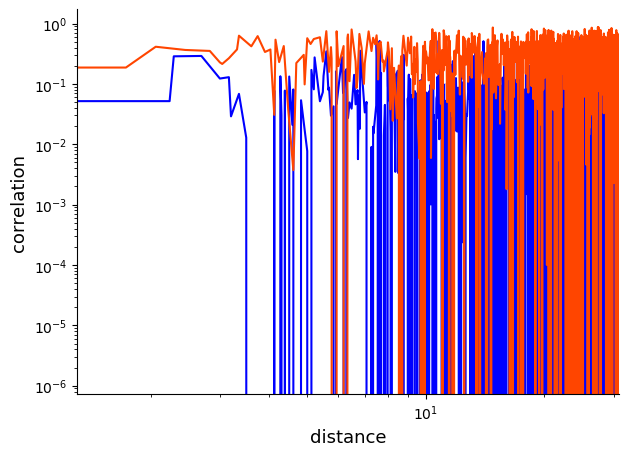

In [29]:
fig, axarr = plt.subplots(figsize = (7,5))
disv_s = sorted(disv)
corrv_s = np.array([x for _,x in sorted(zip(disv,newcorrv))])
corr_vec, dis_vec = [],[]
for n in np.unique(disv_s):
    corr_vec = np.append(corr_vec, np.mean(corrv_s[np.where(disv_s == n)]))
    dis_vec = np.append(dis_vec, n)

xaxis = dis_vec
yaxis = corr_vec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = 'blue')

disv_s = sorted(disv1)
corrv_s = np.array([x for _,x in sorted(zip(disv1,newcorrv1))])
corr_vec, dis_vec = [],[]
for n in np.unique(disv_s):
    corr_vec = np.append(corr_vec, np.mean(corrv_s[np.where(disv_s == n)]))
    dis_vec = np.append(dis_vec, n)

xaxis = dis_vec
yaxis = corr_vec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c='orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance', size = '13')
axarr.set_ylabel('correlation', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

In [5]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
liklist = sorted(glob.glob('*marglik*'))
avlist = sorted(glob.glob('*_av.npy*'))
liklist

[]

In [6]:
num1 = adfn.name_zero('front', 3,6,1)
num1

['03', '04', '05', '06']

In [ ]:
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[0,:]
        M=len(sizes)
        a=min(sizes) #define xmin
        b=max(sizes) #define xmax
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=IS_LN(npart)
        po=IS(npart)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

Done param 0for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 1for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 2for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 3for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 4for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 5for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 6for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 7for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 8for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 9for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 10for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 11for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 12for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 13for fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done param 14for fish PTZ-WILD

In [7]:
import numpy as np 
import scipy.stats as stat
import matplotlib.pyplot as plt


#Functional form for power law
def powerlaw(n,lam):
    zeta=np.sum(1.0/np.arange(a,b+1)**lam)
    return(n**(-lam)/zeta)

#Functional form for lognormal
def lognormal(n,mu,sig):
    return(1.0/n/np.sqrt(2*np.pi*sig**2)*np.exp(-(np.log(n)-mu)**2/(2*sig**2)))


#Calculate loglikelihood for power law
def LogLikelihood(lam):
    zetamat=np.power.outer(1.0/np.arange(a,b+1),lam) 
    zeta=np.sum(zetamat,0)
    nprod=-lam*np.sum(np.log(sizes))
    norm=-M*np.log(zeta)
    loglik=nprod+norm
    return(loglik) 

#Calculate loglikelihood for lognormal
def LogLikelihood_LN(mu,sig):
    T1 = -np.sum(np.log(sizes))
    T2_mat = np.subtract.outer(np.log(sizes),mu)**2
    T2 = -np.sum(T2_mat,0)/(2*sig**2)
    T0 = -M*np.log(np.sqrt(2*np.pi) * sig )
    loglik=T0+T1+T2
    return(loglik) 

#OUTPUT - posterior average exponent, log marginal likelihood, effective sample size = number that tells you how good is your sampler, dont worry
def IS(npart):
    lambda_sample=np.random.uniform(0.1,5,npart)
    weights=LogLikelihood(lambda_sample)+stat.norm.logpdf(lambda_sample,1,3)-stat.uniform.logpdf(lambda_sample,0.1,5)
    maxw=np.max(weights)

    w2 = np.exp(weights-maxw)
    w2_sum = np.sum(w2)

    ESS=1.0/(np.sum((w2/w2_sum)**2))

    mean_lambda = np.dot(lambda_sample,w2)/w2_sum
    return([mean_lambda,maxw + np.log(np.sum(np.exp(weights-maxw)))-np.log(npart),LogLikelihood(lambda_sample), ESS])
#
def IS_LN(npart):
    mu_sample = np.random.uniform(-2.0,2.0,npart)
    sig_sample = np.random.uniform(0.1,5.0,npart)
    weights=LogLikelihood_LN(mu_sample,sig_sample)
    maxw=np.max(weights)

    w2 = np.exp(weights-maxw)
    w2_sum = np.sum(w2)

    ESS=1.0/(np.sum((w2/w2_sum)**2))

    wmax_ID=np.argmax(w2)
    mean_mu = mu_sample[wmax_ID]
    mean_sig = sig_sample[wmax_ID]

    return([mean_mu,mean_sig, maxw + np.log(np.sum(np.exp(weights-maxw)))-np.log(npart), LogLikelihood_LN(mu_sample, sig_sample), ESS])


#find entire posterior dsitr - posterior distribution - range of values 
def plot_samples(npart):
    lambda_sample=np.random.uniform(0.1,5,npart)
    weights=LogLikelihood(lambda_sample)
    maxw=np.max(weights)
    w2 = np.exp(weights-maxw)
    
    plt.hist(lambda_sample,weights=w2,bins=np.linspace(2.5,2.8))
    plt.show()

def plotcomp(lam,mu,sig):
    x = np.linspace(a,b,40) 
    plt.hist(sizes,40,log=True,density=True)
    plt.plot(x,powerlaw(x,lam))
    plt.plot(x,lognormal(x,mu,sig))
    plt.show()
